# Housing Price Prediction

Dataset Description: The data pertains to the houses found in each California district and some summary statistics about them based on the 1990 census data. It contains one instance per district block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people). 

The goal of this task is to design a regression model to predict the median house value conditioned upon a set of input attributes corresponding to a particular California district block. 

The attributes in the dataset are as follows; their names are self-explanatory: 
     

    longitude (continuous): One of the coordinates that are used to identify the California district block 
     

    latitude (continuous): One of the coordinates that are used to identify the California district block 
     

    housing_median_age (continuous): Average age of the house in California district block 
     

    total_rooms (continuous): Total number of rooms of all the houses in the California district block 
     

    total_bedrooms (continuous): Total number of bedrooms of all the houses in the California district block 
     

    population (continuous): Number of people residing in the district block 
     

    households (continuous): Number of families in the district block 
     

    median_income (continuous): Median income for households in the district block of houses (measured in tens of thousands of US Dollars)  
     

    ocean_proximity (categorical): Location of the house. Is it inland, near the bay, near the ocean, etc.  
     

    median_house_value.(continuous): Median house value within a district block (measured in US Dollars)

Our target variable will be median_house_value.  Use the rest of the fields mentioned above to predict the median_house_value. 

## Import Libraries
Import all necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error

### b. Data Loading / Preprocessing

#### i. Loading

1. Load the California housing dataset using `pandas.read_csv()` function and store it in the variable (i.e., a pandas dataframe) named `df’.

2. The resulting data frame should have the shape (20942, 10) indicating that there are 20942 rows and 10 columns.

In [4]:
df=pd.read_csv('housingmod.csv')
df.shape

(20942, 10)

3. Find the missing values in the data frame. If any (i.e., even if one column in each instance / row has a missing value), drop the row using `pandas.DataFrame.dropna()` function. The resulting data frame should have the shape (20735, 10) indicating that there are 20735 rows and 10 columns.

In [30]:
df=df.dropna()
print(df)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
1        -122.23     37.88                  45         2127           435.0   
5        -117.65     35.00                  29         2127           435.0   
6        -117.65     35.00                  29         2127           435.0   
7        -117.65     35.00                  29         2127           435.0   
8        -122.23     37.88                  41          880           129.0   
...          ...       ...                 ...          ...             ...   
20933    -117.65     35.00                  29         2127           435.0   
20935    -122.23     37.88                  45         2127           435.0   
20939    -117.65     35.00                  29         2127           435.0   
20940    -117.65     35.00                  29         2127           435.0   
20941    -117.65     35.00                  29         2127           435.0   

       population  households  median_income  media

4. Now plot a box plot for median house values to check for extreme values using df.boxplot() function 

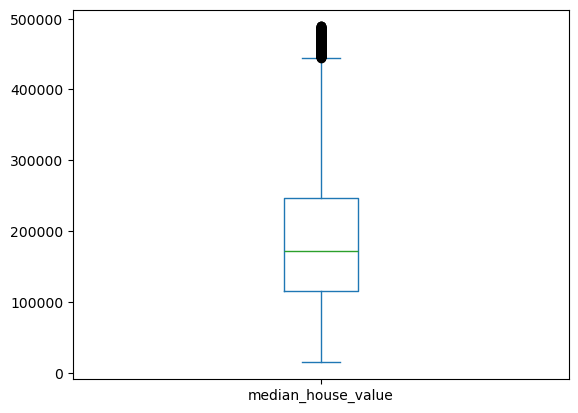

In [32]:
z='median_house_value'
df[z].plot(kind='box')
plt.show()

5.  Now filter the dataframe and remove all the values that are above 1.5iqr
You can find the iqr by subtracting the 75th and 25th quantile using the quantile function in pandas
You can then find the upper and lower limit by adding and subtracting 1.5*iqr to the 75th quantile and 25th quantile repectively

In [34]:

q1=df['median_house_value'].quantile(0.25)
q3=df['median_house_value'].quantile(0.75)
iqr=q3-q1
lb=q1-1.5*iqr
ub=q3+1.5*iqr
df=df[(df['median_house_value'] >= lb) & (df['median_house_value'] <= ub)]

6. You should see that the new shape of the dataframe is (19557,10)

In [37]:
print(df.shape)

(19244, 10)


7. Create a data frame `corr_df` by dropping the columns latitude, longitude, and ocean_proximity using the `pandas.DataFrame.drop()` function. Use the Pearson correlation to find the correlation of each remaining feature in the `corr_df` with the target variable `median_house_value` using the function `pandas.DataFrame.corrwith()`. 

In [39]:
corr_df=df.drop(columns=['latitude','longitude','ocean_proximity'],axis=1)
corr_df.corrwith(corr_df['median_house_value'])

housing_median_age    0.054824
total_rooms           0.148530
total_bedrooms        0.083287
population            0.024627
households            0.103641
median_income         0.628196
median_house_value    1.000000
dtype: float64

In [41]:
X=df.drop(columns='median_house_value',axis=1)
y=df['median_house_value']
print(X)
print(y)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
5        -117.65     35.00                  29         2127           435.0   
6        -117.65     35.00                  29         2127           435.0   
7        -117.65     35.00                  29         2127           435.0   
9        -122.22     37.86                  21         7099          1106.0   
10       -122.24     37.85                  52         1467           190.0   
...          ...       ...                 ...          ...             ...   
20932    -117.65     35.00                  29         2127           435.0   
20933    -117.65     35.00                  29         2127           435.0   
20939    -117.65     35.00                  29         2127           435.0   
20940    -117.65     35.00                  29         2127           435.0   
20941    -117.65     35.00                  29         2127           435.0   

       population  households  median_income ocean_

#### 
ii. Data Visualization

1. Use `pandas.DataFrame.hist(bins = 50)` function for visualizing the variation on the columns housing_median_age, total_rooms, total_bedrooms, population, household, median_income and median_house_value. Plot each histogram as a separate subplot.

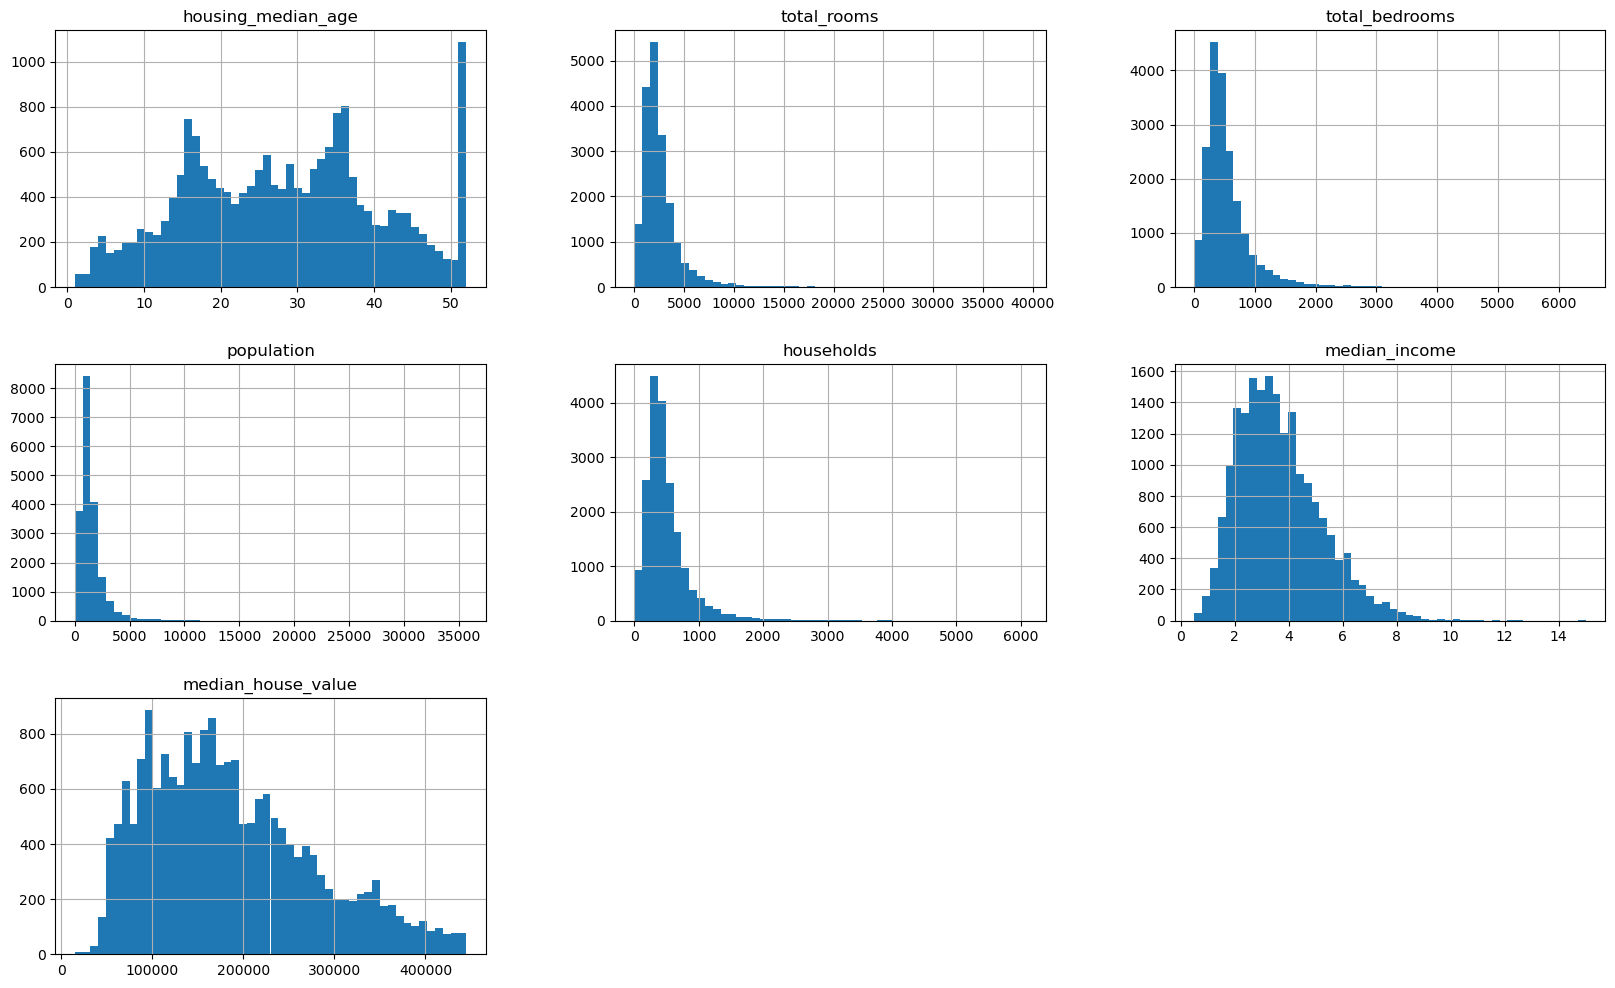

In [43]:
columns=['housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value']
df[columns].hist(bins=50,figsize=(20,12))
plt.show()

2. Use `pandas.dataframe.describe()` function to find the mean, median and standard deviations for each feature and report in the jupyter notebook.

In [45]:
num_df=df.select_dtypes(include=['float64','int64'])
a=num_df.describe()
mean_val=a.loc['mean']
median_val=num_df.median()  
std_dev_val=a.loc['std']
print(mean_val,median_val,std_dev_val)

longitude               -119.550617
latitude                  35.656851
housing_median_age        28.304822
total_rooms             2611.462898
total_bedrooms           539.014134
population              1442.457857
households               500.474797
median_income              3.646448
median_house_value    186696.564955
Name: mean, dtype: float64 longitude               -118.490
latitude                  34.280
housing_median_age        28.000
total_rooms             2115.000
total_bedrooms           435.000
population              1177.000
households               409.000
median_income              3.425
median_house_value    170800.000
dtype: float64 longitude                 2.005634
latitude                  2.148667
housing_median_age       12.452648
total_rooms            2173.452911
total_bedrooms          421.678627
population             1143.021651
households              382.406556
median_income             1.534799
median_house_value    91065.214648
Name: std, dtype: floa

3. Use `pandas.get_dummies` to convert categorical variables into dummy /one-hot encoding. In this case the categorical column is ocean_proximity 

In [47]:
df_dummies=pd.get_dummies(df,columns=['ocean_proximity'],drop_first=True)
print(df_dummies.shape)
print(df_dummies)

(19244, 13)
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
5        -117.65     35.00                  29         2127           435.0   
6        -117.65     35.00                  29         2127           435.0   
7        -117.65     35.00                  29         2127           435.0   
9        -122.22     37.86                  21         7099          1106.0   
10       -122.24     37.85                  52         1467           190.0   
...          ...       ...                 ...          ...             ...   
20932    -117.65     35.00                  29         2127           435.0   
20933    -117.65     35.00                  29         2127           435.0   
20939    -117.65     35.00                  29         2127           435.0   
20940    -117.65     35.00                  29         2127           435.0   
20941    -117.65     35.00                  29         2127           435.0   

       population  households  median_i

#### iii. Data Splitting

1. Split data into training and test sets using the sklearn `train_test_split()` function. Perform 70-30 distribution i.e. 70% training and 30% testing. The result of your data split should yield 4 separate data frames `X_train, X_test, y_train, y_test`. (respectively, the training features, testing features, training targets and testing target).

In [49]:
X=df_dummies.drop(columns=['median_house_value'])
y=df_dummies['median_house_value']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=42)
print(X_train.columns)
print(y_train.shape)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')
(13470,)


#### iv. Data Scaling

1. Use the `StandardScaler()` to instantiate the standard scaler class. Note: You will need two separate scaler objects, one to scale the features, another to scale the target values. 

In [51]:
f_scaler=StandardScaler()
t_scaler=StandardScaler()

2. For each scaler, employ the `fit_transform()` function (only on the training  features, training targets) of the scaler to retrieve the new (scaled) version of the data. Store them in `X_train`, and `y_train` again

In [53]:
df_scaled_f=f_scaler.fit_transform(X_train)
df_scaled_t=t_scaler.fit_transform(y_train.values.reshape(-1,1))
print(df_scaled_f,df_scaled_t)
X_train=df_scaled_f
y_train=df_scaled_t

[[-0.11866189  0.51269314  1.8989429  ... -0.00861653 -0.34233512
  -0.37465415]
 [ 0.34578621 -0.67182625 -0.19043778 ... -0.00861653 -0.34233512
  -0.37465415]
 [-0.99262338  1.59461636 -0.19043778 ... -0.00861653 -0.34233512
  -0.37465415]
 ...
 [ 0.63544202 -0.69980703  1.65786052 ... -0.00861653 -0.34233512
  -0.37465415]
 [-1.21735634  0.88577011 -0.67260256 ... -0.00861653 -0.34233512
  -0.37465415]
 [-1.36218424  0.87177972  0.45244858 ... -0.00861653 -0.34233512
   2.66912834]] [[-1.43637308]
 [ 0.71418108]
 [-1.41548323]
 ...
 [ 0.77685061]
 [ 0.48879069]
 [ 1.36506455]]


3. Scale the `X_test` and `y_test` as well and store the scaled values back in `X_test` and `y_test`. (i.e., use the appropriate “fitted” scaler above to “transform” the test data. Note: the function to be employed in this case is `transform()` as opposed to `fit_transform()`).  
Henceforth, `X_train, y_train, X_test, y_test` will refer to the scaled data unless stated otherwise.

In [55]:
df_scaled_ftest=f_scaler.transform(X_test)
df_scaled_ttest=t_scaler.transform(y_test.values.reshape(-1,1))
print(df_scaled_ftest,df_scaled_ttest)
X_test=df_scaled_ftest
y_test=df_scaled_ttest

[[ 0.66540642 -0.74644165  0.45244858 ... -0.00861653 -0.34233512
  -0.37465415]
 [-0.14862629  0.5173566  -0.11007699 ... -0.00861653 -0.34233512
  -0.37465415]
 [ 0.66041235 -0.8024032   0.53280938 ... -0.00861653 -0.34233512
  -0.37465415]
 ...
 [ 0.5954895  -0.85836474  0.61317017 ... -0.00861653 -0.34233512
  -0.37465415]
 [ 0.82521652 -0.71379741 -1.87801449 ... -0.00861653 -0.34233512
  -0.37465415]
 [ 0.79025806 -0.83038397 -0.99404574 ... -0.00861653 -0.34233512
  -0.37465415]] [[-0.36989172]
 [-1.13841797]
 [-0.98009497]
 ...
 [ 1.67401431]
 [-0.51612061]
 [ 1.48270734]]


4. Use `pandas.DataFrame.hist(bins = 50)` function for visualizing the variation of numerical attributes housing_median_age, total_rooms, total_bedrooms, population, household, median_income and median_house_value for the `X_train` and `y_train` dataset (similar to step b.ii.1 above). Once again, plot each histogram as a separate subplot. 

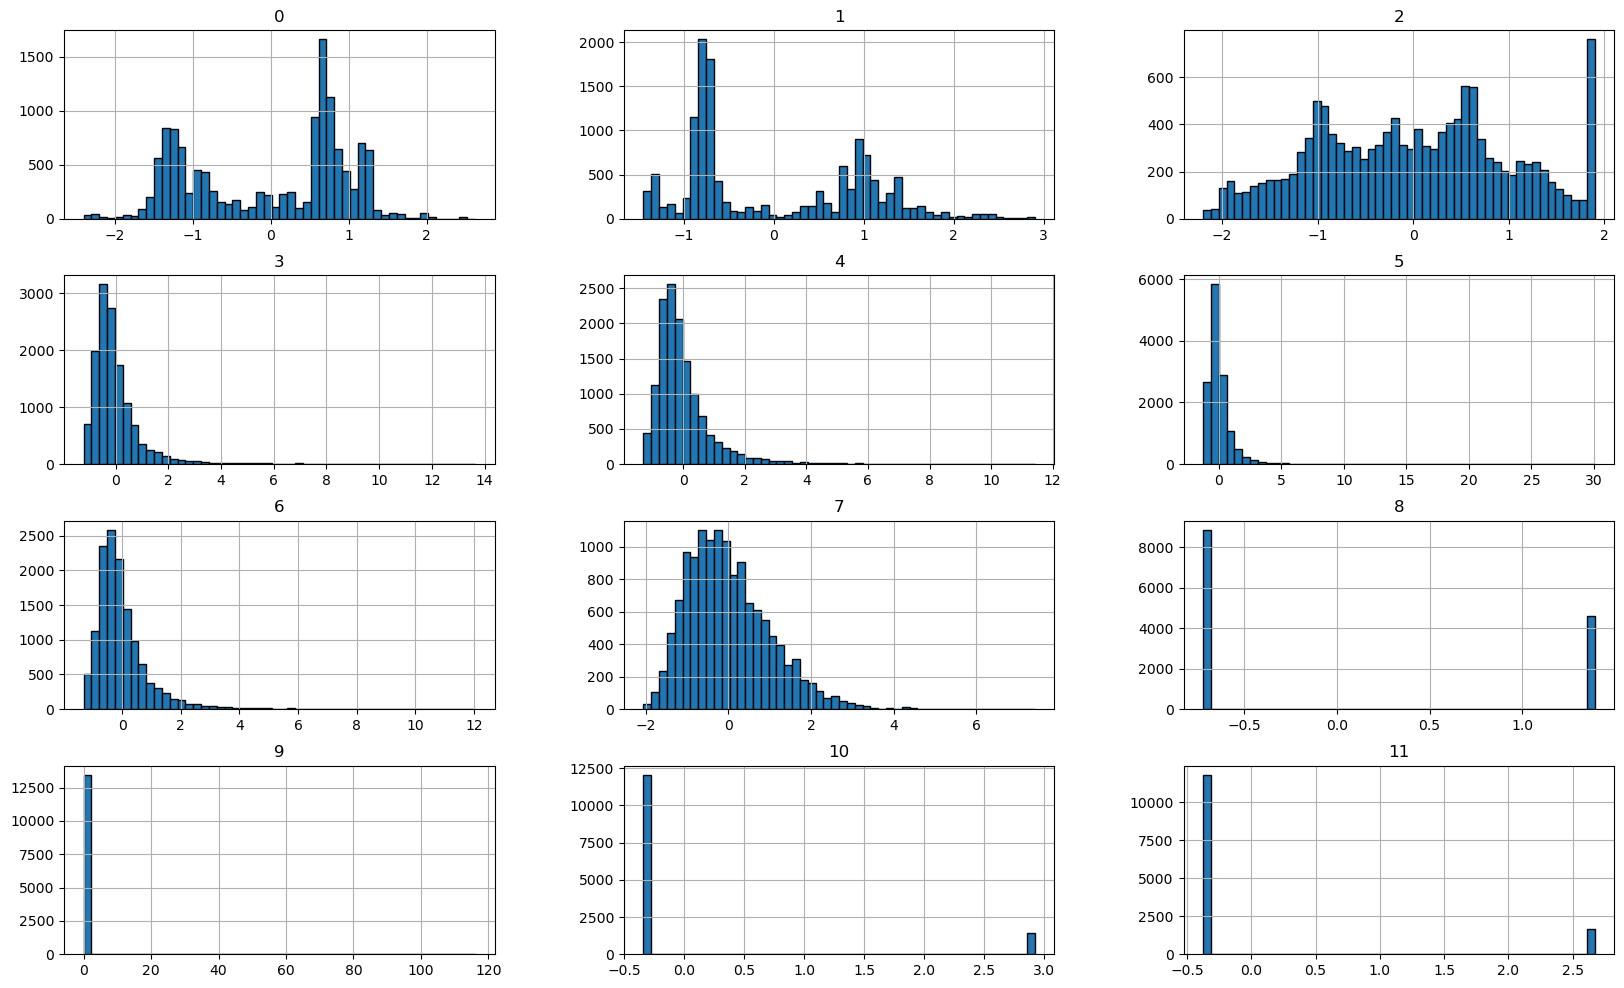

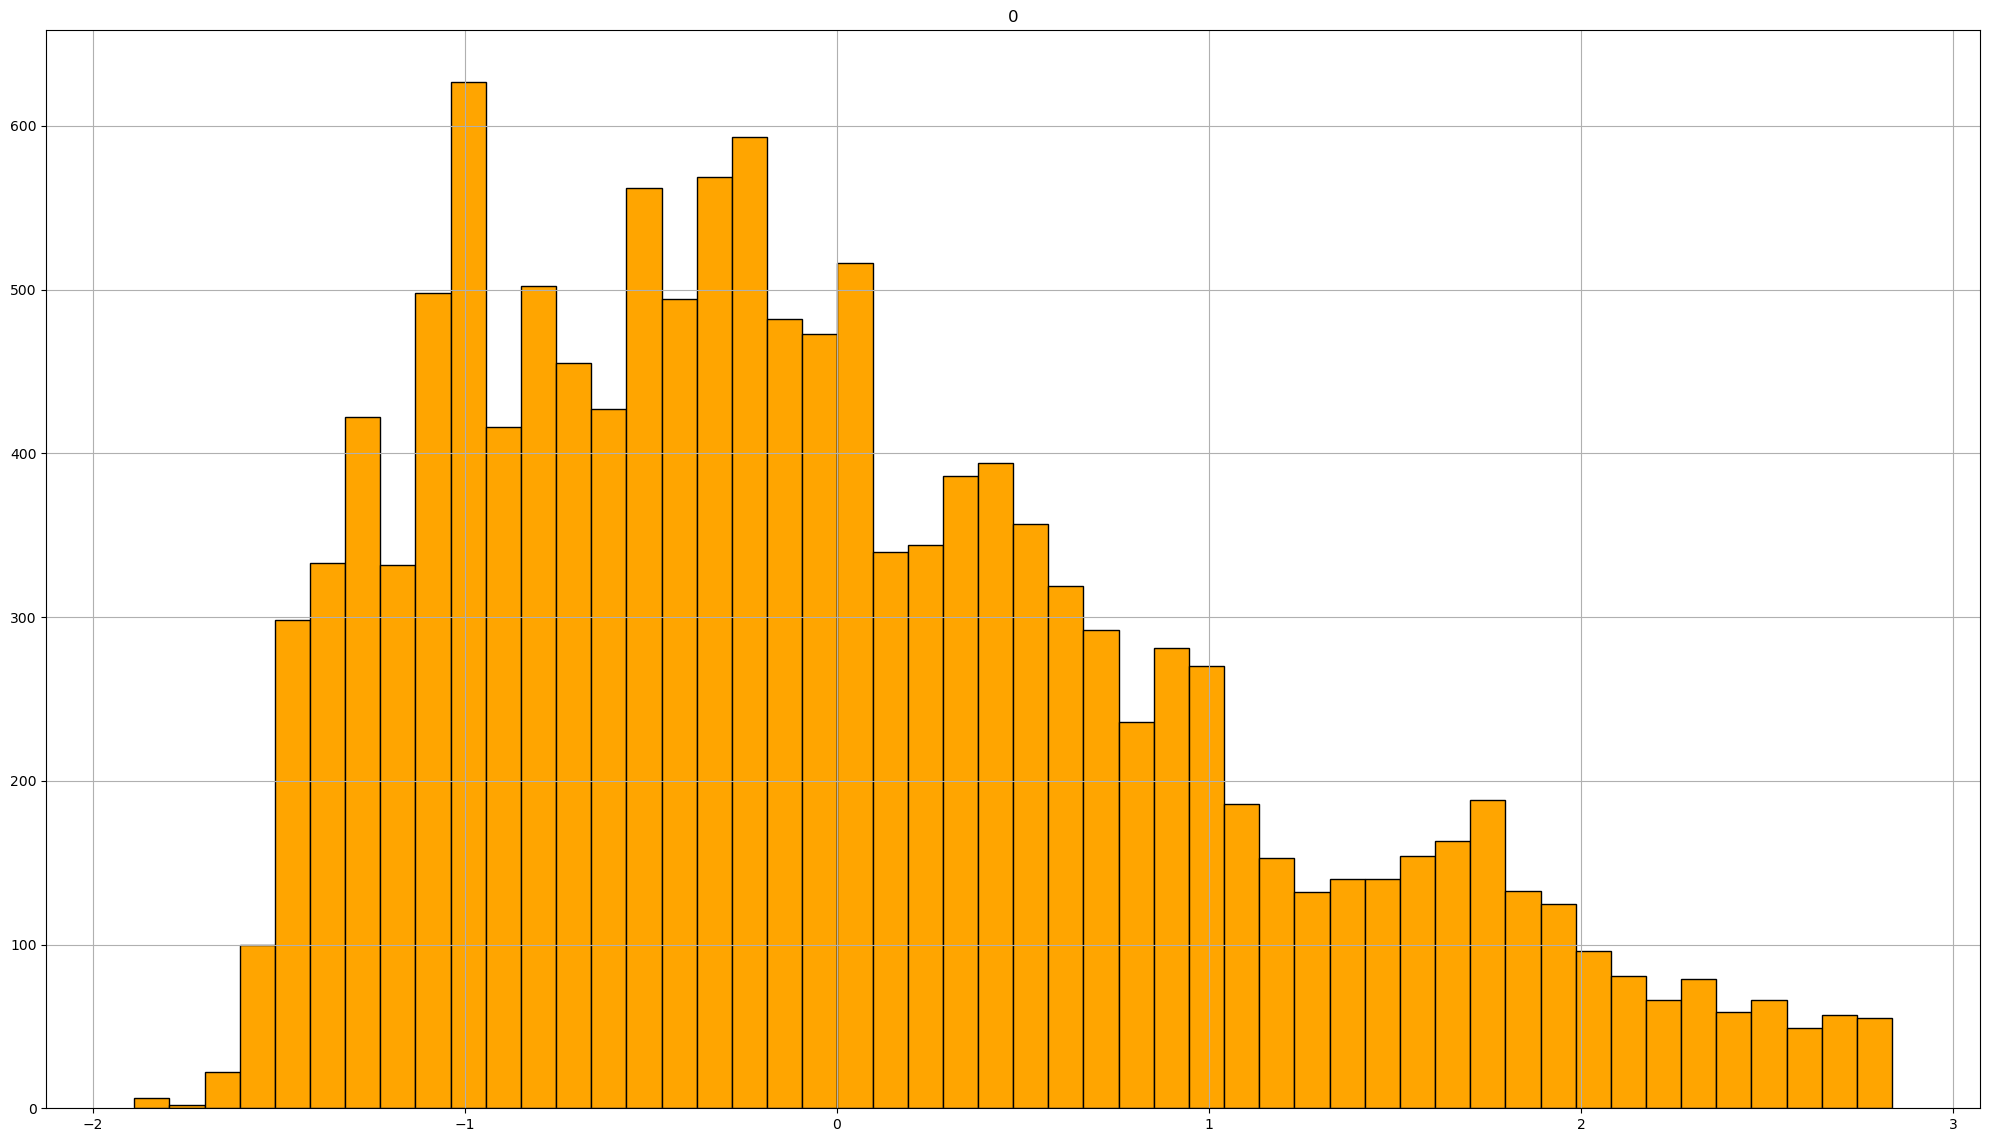

In [57]:
X_train_df=pd.DataFrame(df_scaled_f)
y_train_df=pd.DataFrame(df_scaled_t)
#columns_required=['housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value'] 
X_train_df.hist(bins=50,figsize=(20,12),edgecolor='black')
y_train_df.hist(bins=50,figsize=(20,12),color='orange',edgecolor='black')
plt.tight_layout(rect=[0,0,1,0.96])
plt.show()

### c. Modelling

#### i. Employ Linear Regression from sklearn.linear_model, and instantiate the model.

In [59]:
reg=LinearRegression()

#### ii. Once instantiated, `fit()` the model using the scaled `X_train, y_train` data.

In [61]:
reg.fit(X_train,y_train)

LinearRegression()

#### iii. Employ the `predict()` function to obtain predictions on `X_test`. Store the predictions in a variable named `y_preds`. Note: Since the model has been trained on scaled data (i.e., both features and targets, the predictions will also be in the “scaled” space. We need to transform the predictions back to the original space). 

In [63]:
y_preds=reg.predict(X_test)
print(y_preds)

[[-0.33804745]
 [-0.78354193]
 [-0.50649067]
 ...
 [ 1.28260293]
 [-0.91343471]
 [ 0.83842976]]


#### iv. Use `inverse_transform()` function to convert the normalized data (`y_preds` ) to original scale. Store the transformed values back into `y_preds`.

In [65]:
y_preds=t_scaler.inverse_transform(y_preds)
print(y_preds)

[[155996.34118593]
 [115477.14778261]
 [140675.87451775]
 ...
 [303399.84366438]
 [103662.97073146]
 [263000.82707528]]


#### v. Perform PCA on the features (`X_train`) and set `n_component` as 2.

In [67]:
pca=PCA(n_components=2)
X_train_PCA=pca.fit_transform(X_train)
print(X_train_PCA)

[[-1.9242874   0.44129577]
 [-0.61734187 -0.98757391]
 [-0.44388003  1.75327553]
 ...
 [-1.45278549 -1.13968538]
 [ 3.46234097  1.63451426]
 [-0.84292644  0.49089022]]


1. Show a scatter plot where on the x-axis we plot the first PCA component and second component on the y-axis.

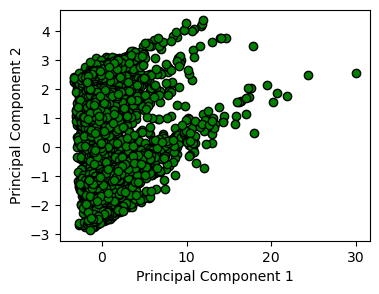

In [69]:
plt.figure(figsize=(4, 3))
plt.scatter(X_train_PCA[:, 0], X_train_PCA[:, 1], color='green', edgecolor='black')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

2. Calculate the total percentage of variance captured by the 2 PCA components using `pca.explained_variance_ratio_`. Also, report the strength of each PCA component using `pca.singular_values_`.

In [71]:
total_percentage=sum(pca.explained_variance_ratio_)*100
print("Total Percentage of Variance Captured:",total_percentage)
a=pca.singular_values_
print(a)

Total Percentage of Variance Captured: 51.50307884780837
[230.55007497 173.48267804]


### d. Evaluation

#### i. Plot a scatter plot using matplotlib.pyplot.scatter function. Plot the predicted median house values on the y-axis vs the actual median house values on the x-axis

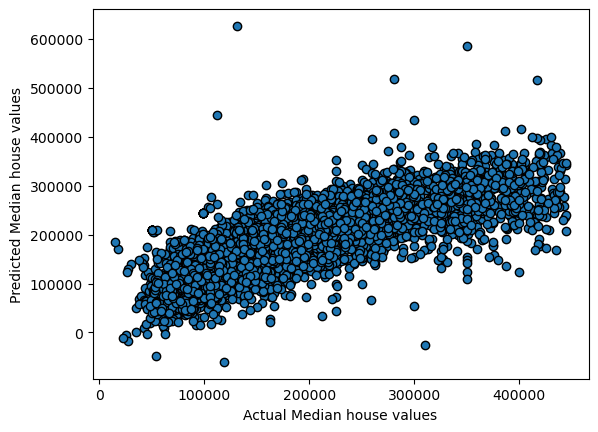

In [73]:
y_test=t_scaler.inverse_transform(y_test)
plt.scatter(y_test,y_preds,edgecolor='black')
plt.xlabel('Actual Median house values')
plt.ylabel('Predicted Median house values')
plt.show()

#### ii. Calculate MAPE, RMSE and R2 for the model and report them in the following table.

In [75]:
MAPE=mean_absolute_percentage_error(y_test,y_preds)
RMSE=root_mean_squared_error(y_test,y_preds)
R2=r2_score(y_test,y_preds)
print(MAPE)
print(RMSE)
print(R2)

0.2781383274374181
57338.73179067959
0.6057377248141348


#### iii. To check how the model performs without removing the outliers, 
Read the dataframe again, and remove the missing values, scale it and retrain the model using sklearn and report the MAPE,RMSE and R2 in the format specified in evaluation #2

In [87]:
file_path = 'housingmod.csv'
df = pd.read_csv(file_path)
df = df.dropna()
df_dummies = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)
X = df_dummies.drop(columns=['median_house_value'])
y = df_dummies['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_scaler = StandardScaler()
y_scaler = StandardScaler()
X_train_scaled = X_scaler.fit_transform(X_train)
y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1))
X_test_scaled = X_scaler.transform(X_test)
y_test_scaled = y_scaler.transform(y_test.values.reshape(-1, 1))
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train_scaled)
y_preds_scaled = lr_model.predict(X_test_scaled)
y_preds = y_scaler.inverse_transform(y_preds_scaled)
y_test = y_scaler.inverse_transform(y_test_scaled)
mape = mean_absolute_percentage_error(y_test, y_preds)
rmse =root_mean_squared_error(y_test, y_preds)
r2 = r2_score(y_test, y_preds)
results = pd.DataFrame({
    "Metric": ["MAPE", "RMSE", "R2 Score"],
    "Value": [mape, rmse, r2]
})
print(results)

     Metric         Value
0      MAPE      0.337018
1      RMSE  92951.104298
2  R2 Score      0.479201
